{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Identify the CRS of a spatial dataset and reproject it to another CRS in **Python**.
* Clip a spatial vector point and line layer to the spatial extent of a polygon layer in **Python** using **geopandas**.
* Dissolve polygons based upon an attribute in **Python** using **geopandas**.
* Join spatial attributes from one shapefile to another in **Python** using **geopandas**.

</div>

## Data in Different Coordinate Reference Systems

In the previous chapter, you attempted to plot two datasets together - a roads layer and 
the locations of plots where our field work was occuring. The layers did not plot 
properly even though you know the data are for the same geographic location. The challenge
as a reminder is below:

Often when data do not line up properly, it is because they are in different 
coordinate reference systems (CRS). In this lesson you will learn how to reproject 
data from one CRS to another - so that the data line up properly. 


## Working With Spatial Data From Different Sources
You often need to gather spatial datasets for from
different sources and/or data that cover different spatial `extents`. Spatial
data from different sources and that cover different extents are often in
different Coordinate Reference Systems (CRS).

Some reasons for data being in different CRSs include:

1. The data are stored in a particular CRS convention used by the data
provider which might be a federal agency, or a state planning office.
2. The data are stored in a particular CRS that is customized to a region.
For instance, many states prefer to use a **State Plane** projection customized
for that state.

<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/compare-mercator-utm-wgs-projections.jpg">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/compare-mercator-utm-wgs-projections.jpg" alt="Maps of the United States using data in different projections.">
    </a>
    <figcaption>Maps of the United States using data in different projections.
    Notice the differences in shape associated with each different projection.
    These differences are a direct result of the calculations used to "flatten"
    the data onto a 2-dimensional map. Often data are stored purposefully in a
    particular projection that optimizes the relative shape and size of
    surrounding geographic boundaries (states, counties, countries, etc).
    Source: opennews.org</figcaption>
</figure>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as et

# Setting plotting style for the notebook
sns.set_style("white")
sns.set(font_scale=1.5)

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Revisiting the challenge from a previous lesson, here are the two layers:
Notice the CRS of each layer.


In [2]:
# Import the data
sjer_roads_path = os.path.join("data", "spatial-vector-lidar", "california", 
                               "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

# aoi stands for area of interest
sjer_aoi_path = os.path.join("data", "spatial-vector-lidar", "california", 
                             "neon-sjer-site", "vector_data", "SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

# View the Coordinate Reference System of both layers 
print(sjer_roads.crs)
print(sjer_aoi.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:32611'}


To plot the data together, they need to be in the same CRS. You can change the CRS which means you are reproject the data from one CRS to another CRS using the geopandas method:

`to_crs(specify-crs-here)`

The CRS can be specified using an epsg code - as follows:

`epsg=4269`

IMPORTANT: When you reproject data you are modifying it. Thus you are introducing some uncertainty into your data. While this is a slightly less important issue when working with vector data (compared to raster), it's important to consider.

Often you may consider keeping the data that you are doing the analysis on in the correct projection that best relates spatially to the area that you are working in. IE use the CRS that best minimizes errors in distance/ area etc based on your analysis. 

If you are simply reprojecting to create a base map then it doesn't matter what you reproject!

In [3]:
# Reproject the aoi to match the roads layer
sjer_aoi_wgs84  = sjer_aoi.to_crs(epsg=4269)

/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


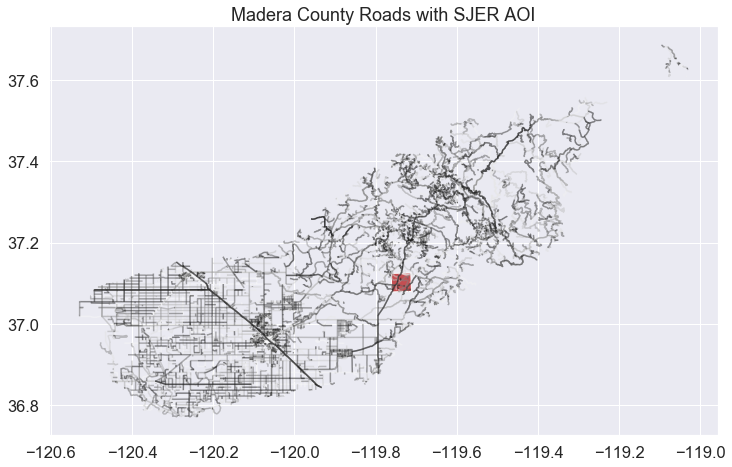

In [4]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

sjer_roads.plot(cmap='Greys', ax=ax, alpha=.5)
sjer_aoi_wgs84.plot(ax=ax, markersize=10, color='r')

ax.set_title("Madera County Roads with SJER AOI");

Great! you've now reprojected a dataset to be able to map the sjer AOI on top of the roads layer. 
Let's try this process again but this time using some census data boundaries. 

## Import US Boundaries - Census Data

There are many good sources of boundary base layers that you can use to create a
basemap. Some `Python` packages even have these base layers built in to support quick
and efficient mapping. In this tutorial, you will use boundary layers for the
United States, provided by the
<a href="https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html" target="_blank" data-proofer-ignore=''> United States Census Bureau.</a>

It is useful to have shapefiles to work with because you can add additional
attributes to them if need be - for project specific mapping.

## Read US Boundary File

You will use the geopandas `.read_file()` function to import the
`/usa-boundary-layers/US-State-Boundaries-Census-2014` layer into `Python`. This layer
contains the boundaries of all continental states in the U.S. Please note that
these data have been modified and reprojected from the original data downloaded
from the Census website to support the learning goals of this tutorial.

In [5]:
# Import data into geopandas dataframe
state_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

# View data structure
type(state_boundary_us)

geopandas.geodataframe.GeoDataFrame

In [6]:
# View the first few lines of the data
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


Next, plot the U.S. states data. Below you use geopandas to plot your geodataframe.
Also notice that you are using `ax.set_axis_off()` to hide the x, y axis of our plot.

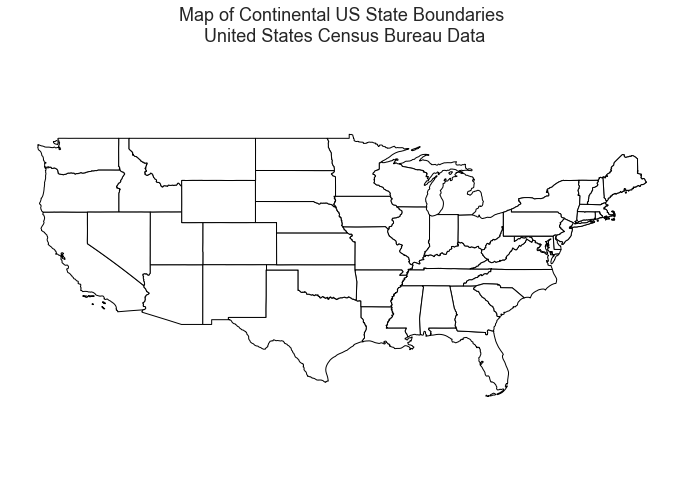

In [7]:
# Plot the data
fig, ax = plt.subplots(figsize = (12,8))
state_boundary_us.plot(ax = ax, facecolor = 'white', edgecolor = 'black')

# Add title to map
ax.set(title="Map of Continental US State Boundaries\n United States Census Bureau Data")

# Turn off the axis  
plt.axis('equal')
ax.set_axis_off()

plt.show()

## U.S. Boundary Layer

You can add a boundary layer of the United States to your map to make it look
nicer. You will import
`data/week5/usa-boundary-layers/US-Boundary-Dissolved-States`.
If you specify a thicker line width using `linewidth=4` for the border layer, it will
make our map visually pop!

In [8]:
# Import United States country boundary data
county_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                       "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(county_boundary_us_path)

type(country_boundary_us)

geopandas.geodataframe.GeoDataFrame

In [9]:
# https://matplotlib.org/1.4.3/examples/color/named_colors.html

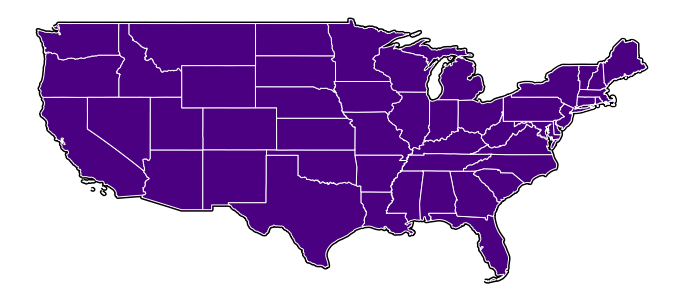

In [10]:
# Plot data 
fig, ax = plt.subplots(figsize = (12,7))
country_boundary_us.plot(ax=ax, 
                         alpha=1, 
                         edgecolor="black",
                         color = "white",
                         linewidth=4)

state_boundary_us.plot(ax = ax, 
                      color = "indigo",
                      edgecolor = "white",
                      linewidth = 1)
ax.set_axis_off()
plt.show()

Next, add the SJER study area site locations to your map.
As you add these layers, take note of the class of each object and the CRS. 

HINT: AOI stands for  "Area of Interest". This is your study area.


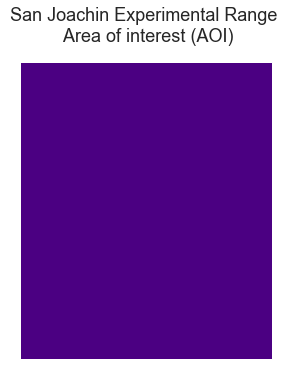

In [11]:
# Plot the data
fig, ax = plt.subplots(figsize = (6,6))

sjer_aoi.plot(ax=ax, color = "indigo")
ax.set(title='San Joachin Experimental Range \n Area of interest (AOI)')

ax.set_axis_off()
plt.show()

The SJER AOI layer plots nicely. Next, add it as a layer on top of the U.S. states and boundary
layers in your basemap plot.

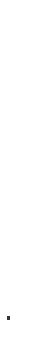

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))

country_boundary_us.plot(ax=ax, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3, 
                         alpha=.8)

state_boundary_us.plot(ax = ax, 
                       color = "white", 
                       edgecolor ="gray")
sjer_aoi.plot(ax=ax, color = "indigo")

# Turn off axis  
ax.set_axis_off()
plt.show()

What do you notice about the resultant plot? Do you see the AOI boundary in the 
California area? Is something wrong with our map?

Let's check out the CRS (`.crs`) of both datasets to see if you can identify any
issues that might cause the point location to not plot properly on top of our
U.S. boundary layers.

In [13]:
# View CRS of each layer
print(sjer_aoi.crs)
print(country_boundary_us.crs)
print(state_boundary_us.crs)

{'init': 'epsg:32611'}
{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


Looking at the CRS information returned above, it seems as if our data are in different CRS'. You can tell this by looking at
the EPSG codes:

* 32611
* 4326

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge
Look up the EPSG codes listed above on the spatialreference.org website and answer the following questions. 

1. What CRS does each code correspond with?
2. Is the CRS projected or geographic? 

<!-- 4326 - WGS 84 geographic
32611 - UTM zone 11?? north - projected -->

</div>

## CRS Units - View Object Extent

Next, let's view the extent or spatial coverage for the `sjer_aoi` spatial
object compared to the `state_boundary_us` object.

In [14]:
# View spatial extent for both layers 
print(sjer_aoi.total_bounds)
print(state_boundary_us.total_bounds)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
[-124.725839   24.498131  -66.949895   49.384358]



Note the difference in the units for each object. The extent for
`state_boundary_us` is in latitude and longitude which yields smaller numbers
representing decimal degree units. Our AOI boundary point is in UTM, is
represented in meters.

Most importantly the two extents DO NOT OVERLAP. Yet you know that your data should overlap. 


## Reproject Vector Data

Now you know your data are in different CRS. To address this, you have to modify
or **reproject** the data so they are all in the **same** CRS. You can use
`.to_crs()` function to reproject your data. When you reproject the data, you
specify the CRS that you wish to transform your data to. This CRS contains
the datum, units and other information that `Python` needs to **reproject** our data.

The `to_crs()` function requires two inputs:

1. the name of the object that you wish to transform 
2. the CRS that you wish to transform that object to - - this can be in EPSG format or an entire project 4 string. In this case you can
use the `crs` value from the `state_boundary_us` object :
`.to_crs(state_boundary_us.crs)`

<i class="fa fa-star"></i> **Data Tip:** `.to_crs()` will only work if your
original spatial object has a CRS assigned to it AND if that CRS is the
correct CRS!
{: .notice--warning }

Next, let's reproject our point layer into the geographic - latitude and
longitude `WGS84` coordinate reference system (CRS).

In [15]:
# Reproject the aoi to the same CRS as the state_boundary_use object
sjer_aoi_WGS84 = sjer_aoi.to_crs(state_boundary_us.crs)

# View CRS of new reprojected layer
print(sjer_aoi.total_bounds)
print('sjer_aoi crs: ', sjer_aoi_WGS84.crs)
print('state boundary crs:', state_boundary_us.crs)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
sjer_aoi crs:  {'init': 'epsg:4326'}
state boundary crs: {'init': 'epsg:4326'}


/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


If you want, you can reproject using the full proj.4 string too. Below,
the CRS for the EPSG code 4326 from the <a href="http://spatialreference.org/ref/epsg/wgs-84/" target="_blank">spatialreference.org website</a> is used as the crs argument.


In [16]:
# Reproject using the full proj.4 string copied from spatial reference.org
sjer_aoi_WGS84_2 = sjer_aoi.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))




Once our data are reprojected, you can try to plot again.




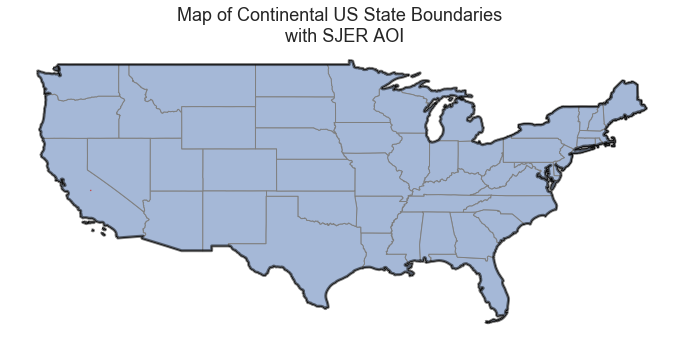

In [17]:
fig, ax = plt.subplots(figsize = (12,8))

state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

country_boundary_us.plot(ax=ax,
                         alpha=.5, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)
sjer_aoi_WGS84.plot(ax=ax, 
                    color='springgreen',
                   edgecolor = "r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

ax.set_axis_off()
plt.show()

It's hard to see the tiny extent box on a map of the entire US. Try to zoom in on just a 
small portion of the map to better see the extent. To do this you can adjust the x and y limits
as follows:

`ax.set(xlim=[minx, maxx], ylim=[miny, maxy])`

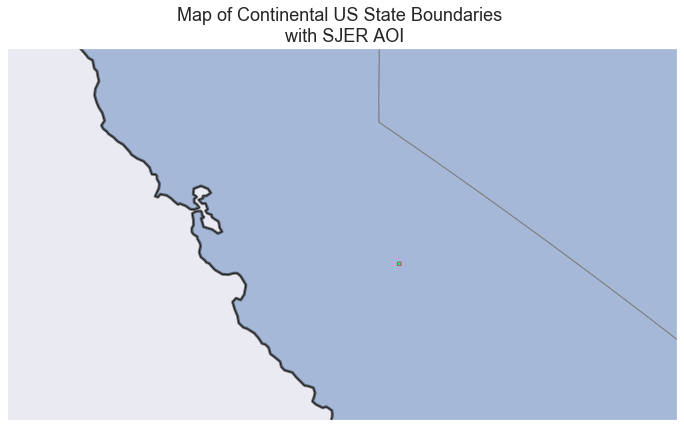

In [18]:
# Zoom in on just the area 
fig, ax = plt.subplots(figsize = (12,8))

state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

country_boundary_us.plot(ax=ax,
                         alpha=.5, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)

sjer_aoi_WGS84.plot(ax=ax, 
                    color='springgreen',
                   edgecolor = "r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")
ax.set(xlim=[-125, -116], ylim=[35, 40])

# Turn off axis  
ax.set(xticks = [], yticks = []);

In [19]:
# Grab the centroid x, y location of the aoi and turn it into a new spatial object. 
AOI_point = sjer_aoi_WGS84["geometry"].centroid
type(AOI_point)

geopandas.geoseries.GeoSeries

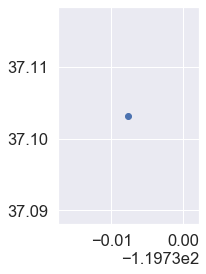

In [20]:
sjer_aoi_WGS84["geometry"].centroid.plot();

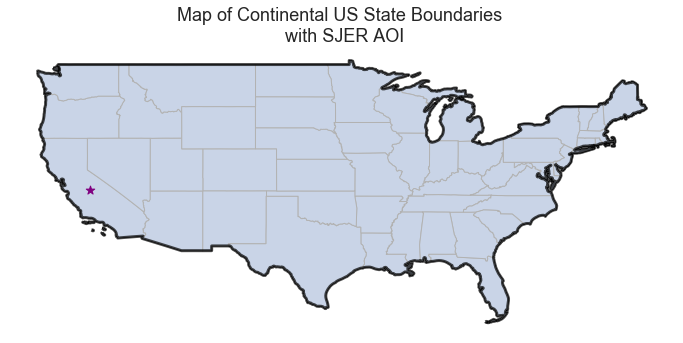

In [21]:
fig, ax = plt.subplots(figsize = (12,7))

state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

country_boundary_us.plot(ax=ax,
                         alpha=.7, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)

AOI_point.plot(ax=ax,
              markersize=80,
              color='purple',
              marker='*')

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

# Turn off axis  
ax.set_axis_off();


Reprojecting our data ensured that things line up on our map! It will also
allow us to perform any required geoprocessing (spatial calculations /
transformations) on our data.


<div class="notice--info" markdown="1">

## Additional Resources - CRS 

* <a href="http://proj.maptools.org/faq.html" target="_blank">More information on the proj.4 format.</a>
* <a href="http://spatialreference.org" target="_blank">An excellent CRS reference website</a>

</div>